In [1]:
import keras
import pickle
import numpy as np
import cv2
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [2]:
with open('Data/traffic-signs/train.p', 'rb') as f:
    train_Data = pickle.load(f)
with open('Data/traffic-signs/test.p', 'rb') as f:
    test_Data = pickle.load(f)
with open('Data/traffic-signs/valid.p', 'rb') as f:
    valid_Data = pickle.load(f)

In [3]:
print(type(train_Data))
print(train_Data.keys())
data = pd.read_csv('Data/traffic-signs/signnames.csv')
print(data.keys())

<class 'dict'>
dict_keys(['coords', 'labels', 'features', 'sizes'])
Index(['ClassId', 'SignName'], dtype='object')


In [4]:
X_train, Y_train = train_Data['features'], train_Data['labels']
X_test, Y_test = test_Data['features'], test_Data['labels']
X_valid, Y_valid = valid_Data['features'], valid_Data['labels']

In [5]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


1


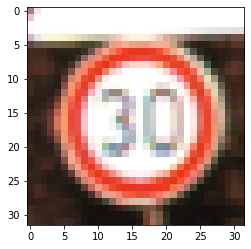

In [6]:
plt.imshow(X_train[3000])
print(Y_train[3000])

In [7]:
def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

(32, 32)


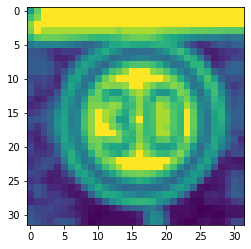

In [8]:
img = preprocess(X_train[3000])
print(img.shape)
plt.imshow(img)

In [9]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_valid = np.array(list(map(preprocess, X_valid)))

(32, 32)


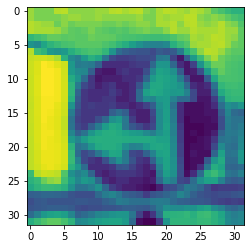

In [10]:
img = X_train[5000]
print(img.shape)
plt.imshow(img)

In [11]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 32, 32, 1)

In [12]:
data_gen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, zoom_range = 0.2, shear_range = 0.1, rotation_range = 10)
data_gen.fit(X_train)

In [13]:
Y_train = to_categorical(Y_train, 43)
Y_test = to_categorical(Y_test, 43)
Y_valid = to_categorical(Y_valid, 43)

In [14]:
def lenet_model():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape = (32, 32, 1), activation = 'relu'))
    model.add(Conv2D(60, (5,5), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(30, (3,3), activation = 'relu'))
    model.add(Conv2D(30, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation = 'softmax'))
    model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [15]:
model = lenet_model()
print(model.summary())

W0131 11:24:35.634037 4757652928 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0131 11:24:35.650248 4757652928 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0131 11:24:35.655497 4757652928 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0131 11:24:35.680657 4757652928 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:39

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)               0         
__________

In [16]:
history = model.fit_generator(data_gen.flow(X_train, Y_train, batch_size = 50), steps_per_epoch = 2000, shuffle = 1, epochs = 10, validation_data = (X_valid, Y_valid))

W0131 11:24:35.906155 4757652928 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
2000/2000 [==============================] - 209s 104ms/step - loss: 0.9321 - acc: 0.7290 - val_loss: 0.1180 - val_acc: 0.9649
Epoch 2/10
2000/2000 [==============================] - 205s 103ms/step - loss: 0.2139 - acc: 0.9337 - val_loss: 0.0486 - val_acc: 0.9866
Epoch 3/10
2000/2000 [==============================] - 207s 103ms/step - loss: 0.1471 - acc: 0.9533 - val_loss: 0.0402 - val_acc: 0.9884
Epoch 4/10
2000/2000 [==============================] - 217s 108ms/step - loss: 0.1159 - acc: 0.9643 - val_loss: 0.0314 - val_acc: 0.9914
Epoch 5/10
2000/2000 [==============================] - 211s 105ms/step - loss: 0.0919 - acc: 0.9714 - val_loss: 0.0254 - val_acc: 0.9916
Epoch 6/10
2000/2000 [==============================] - 217s 109ms/step - loss: 0.0813 - acc: 0.9753 - val_loss: 0.0497 - val_acc: 0.9887
Epoch 7/10
2000/2000 [==============================] - 207s 103ms/step - loss: 0.0755 - acc: 0.9774 - val_loss: 0.0316 - val_acc: 0.9912
Epoch 8/10
2000/2000 [============

Text(0.5, 1.0, 'Loss')

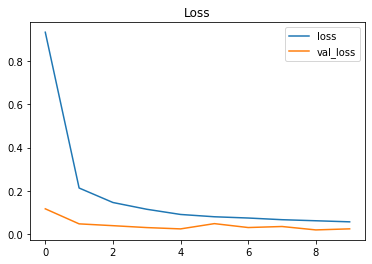

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')

Text(0.5, 1.0, 'Accuracy')

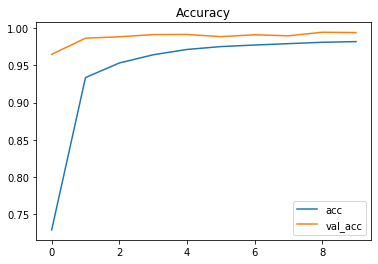

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')

In [19]:
score = model.evaluate(X_test, Y_test, verbose = 0)

In [20]:
print("Test Score", score[0])
print("Test Accuracy", score[1])

Test Score 0.09560345615589588
Test Accuracy 0.9771971496153897


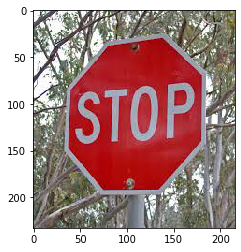

In [21]:
from PIL import Image
img = Image.open("images/test13.jpg")
plt.imshow(img)

In [22]:
img = np.asarray(img)
img = cv2.resize(img, (32,32))
img = preprocess(img)
img = img.reshape(1, 32, 32, 1)
print(img.shape)

(1, 32, 32, 1)


In [23]:
prediction = model.predict_classes(img)
print(data.iloc[prediction,[1]])

   SignName
14     Stop


In [24]:
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [25]:
model.save('traffic.h5')